<h1 style ="text-align:center"> CSC 3220-001 </h1>
<h2 style ="text-align:center"> Exploratory Data Analysis: Netflix Recommender System </h2>
<h3 style ="text-align:center"> 11/22/2022 </h3>
<h4 style ="text-align:center"> Antonio Brown </h4>
<h4 style ="text-align:center"> Cade Kennedy </h4>
<h4 style ="text-align:center"> Christine Ong </h4>
<h4 style ="text-align:center"> Daniel Harnden </h4>
<h4 style ="text-align:center"> Shelby Smith </h4>

---

# Summary

In this Exploratory Analysis we will find patterns and relationships to use for reference when creating our Netflix movie recomendation system.

# Data Sources

Below we import the tools we need to work with the data such as:
        
        - pandas - for data analysis and manipulation
        - numpy - for working with arrays
        - matplotlib.pyplot - for interactive plots and simple cases of programmatic plot generation
        - searborn - for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Below we read the cvs data we will be using in this report:
        
        - netflix1.csv 
               - https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows
        - Netflix_Dataset_Movie.csv
        - Netflix_Dataset_Rating.csv
               - https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset

In [2]:
df = pd.read_csv("netflix1.csv")
df2 = pd.read_csv("Netflix_Dataset_Movie.csv")
df3 = pd.read_csv("Netflix_Dataset_Rating.csv")

# Exploratory Analysis

### Checking for Null Values

Below we check to see if the dataframe containing "netflix1.csv" has any null values

In [3]:
df[df.isnull()].count()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Below we check to see if the dataframe containing "Netflix_Dataset_Movie.csv" has any null values

In [4]:
df2[df2.isnull()].count()

Movie_ID    0
Year        0
Name        0
dtype: int64

Below we check to see if the dataframe containing "Netflix_Dataset_Rating.csv" has any null values

In [5]:
df3[df3.isnull()].count()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

We determine that none of the dataframes have null values, and we have chosen to continues on to merging th dataframes in order to see the relationships between all of the data.

### Merging the Dataframes

To start we merge the df2 and df3 dataframes containing "Netflix_Dataset_Movie.csv" and "Netflix_Dataset_Rating.csv" respectivly.

In [6]:
df_ratings = df2.merge(df3)

Next we merge the df_ratings dataframe from above, with the df dataframe containing "netflix1.csv" data, but first we change the names of the df_ratings columns to the ones that match the netflix rating to allow them to merge successfully.

In [7]:
df_ratings = df_ratings.rename(columns={"Name": "title", "Rating": "user_rating"})
df = pd.merge(df, df_ratings)

### Manipulating Data

Next we change Type to a Nominal variable "is_movie" where 0 is not a movie and 1 is a movie.

In [8]:
df["is_movie"] = [1 if i=="Movie" else 0 for i in df["type"]]


Next we convert the first item in "listed_in" to a new column "genres", we keep the first one because we assume it is the most important.

In [9]:
list_genres = []
for i in range(len(df)):
    list_genres.append(df["listed_in"].iloc[i].split(", ")[0])
df["genres"] = pd.Series(list_genres)

Next we remove the minutes units from all movies and remove times from anything not labled as a movie.

In [10]:
duration = []
for i in range(len(df)):
    if df["is_movie"].iloc[i]==1:
        duration.append(int(df["duration"].iloc[i][:-4]))
    else:
        duration.append(1)
df["duration"] = pd.Series(duration)

### Frequency Distributions

## NOTE: Label all these graphs please Daniel and Cade

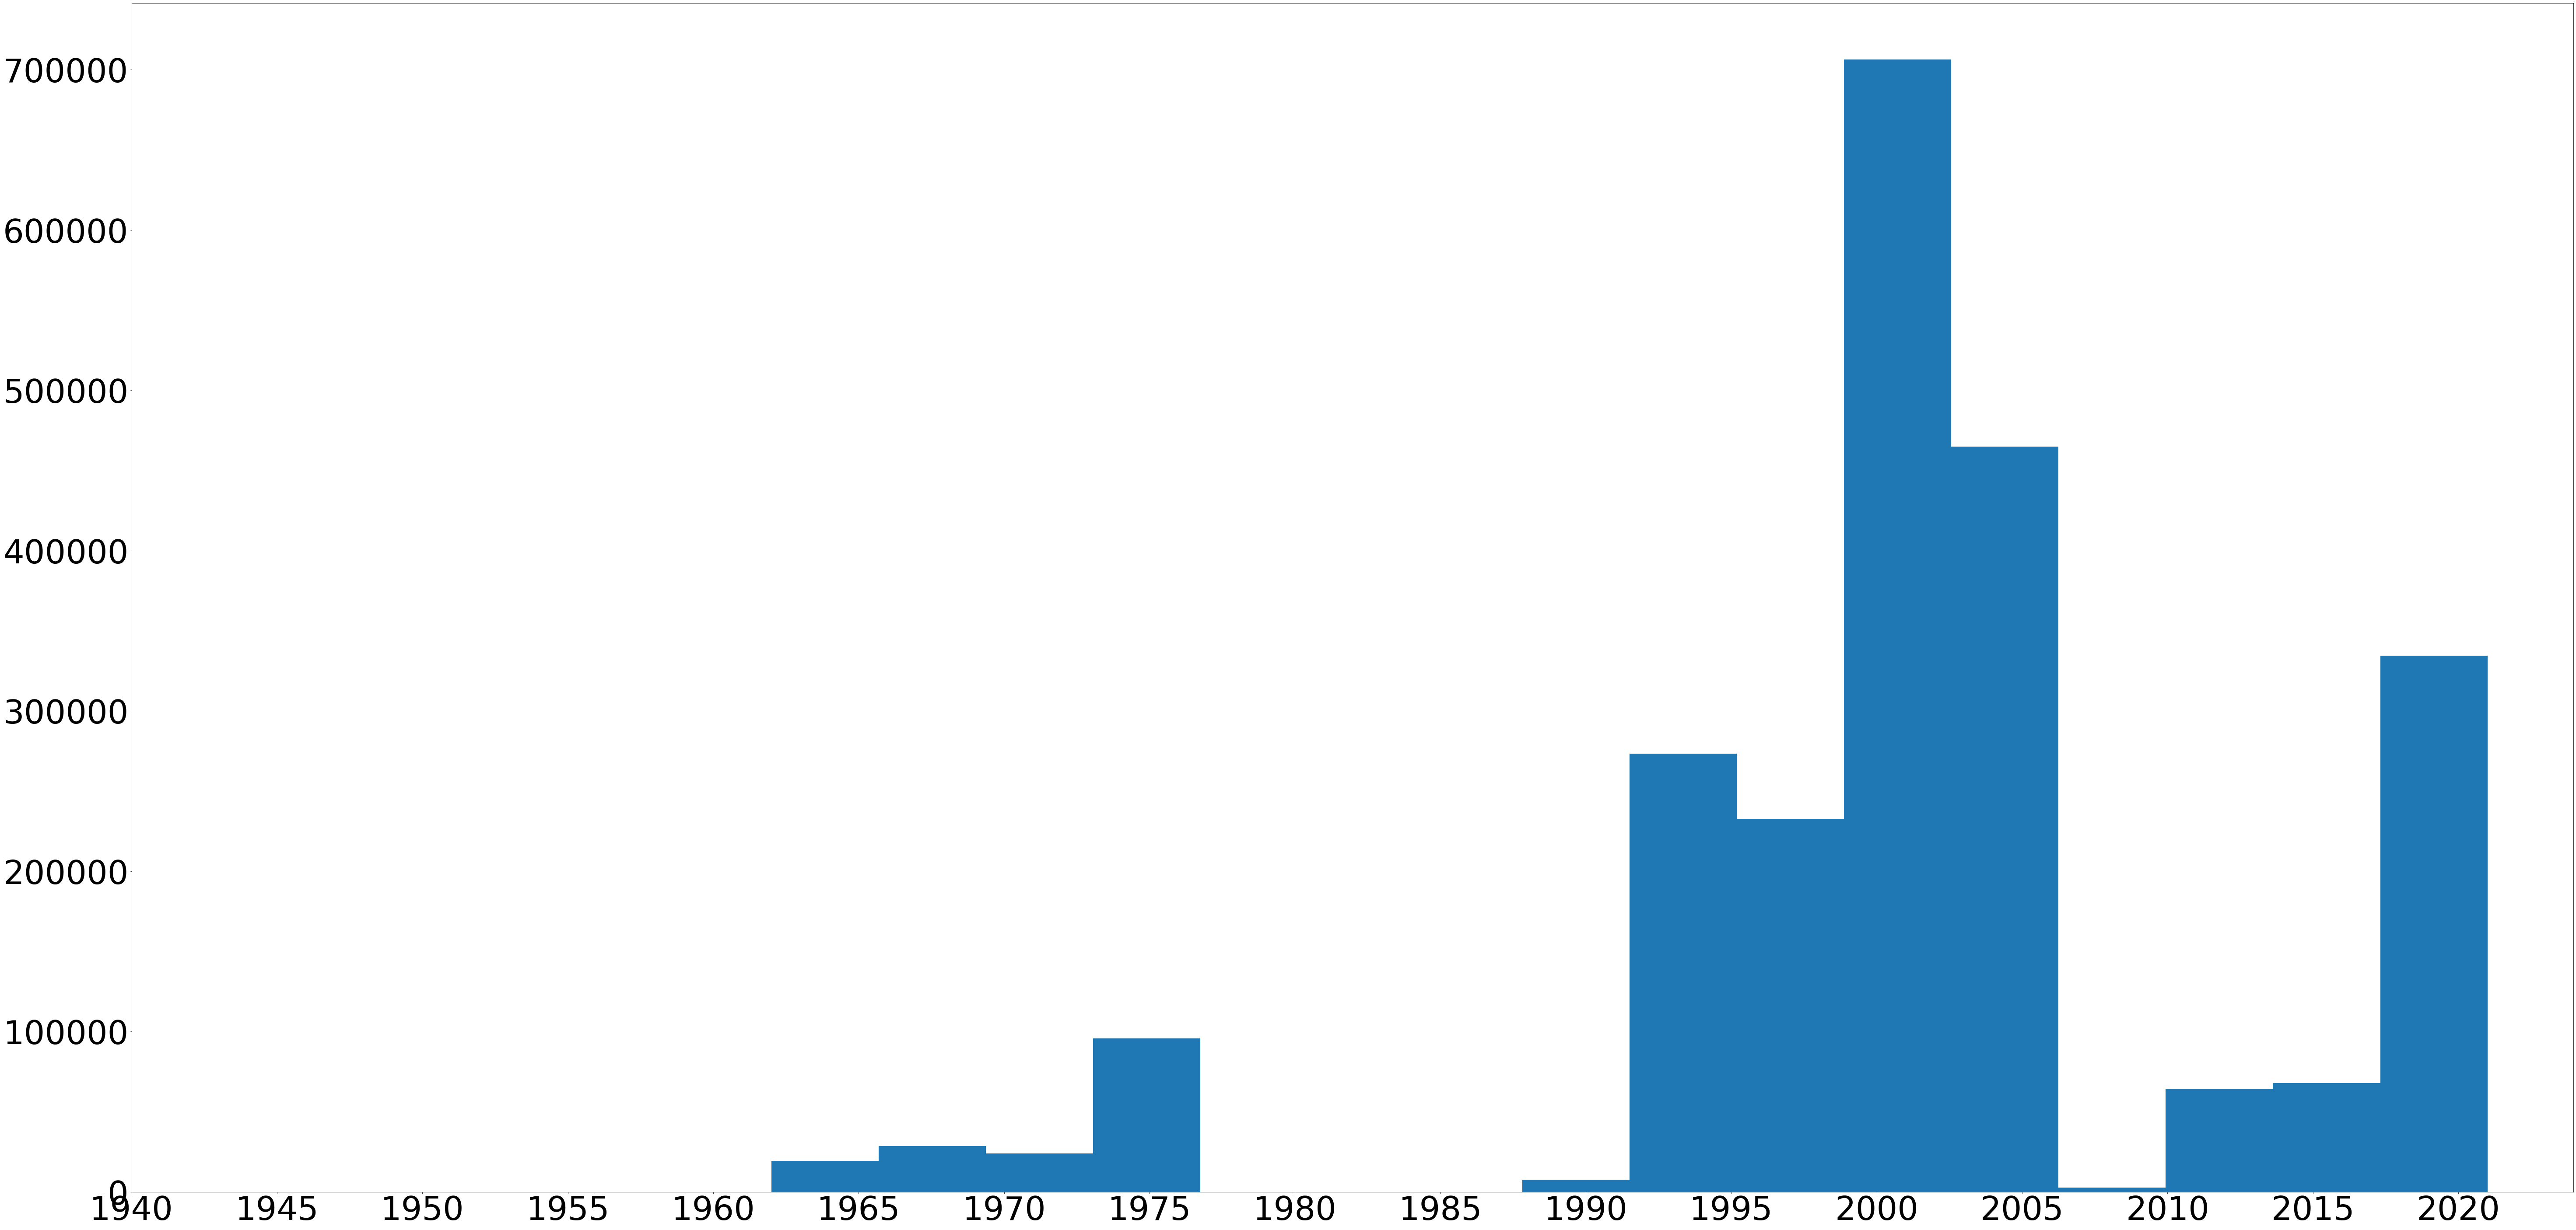

In [11]:
plt.figure(figsize=(100,50))
plt.hist(df["release_year"], bins = 16)
plt.tick_params(axis='both', which='major', labelsize=75)
plt.xticks([i for i in range(1940, 2021, 5)])
plt.show()

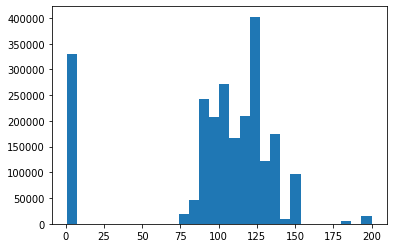

In [12]:
plt.hist(df["duration"], bins=30, )
plt.show()

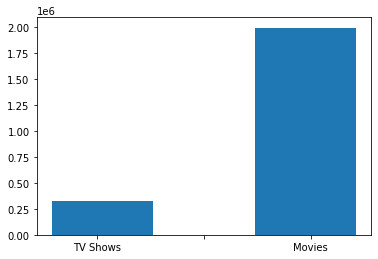

2321442

In [13]:
plt.hist(df["is_movie"], bins=3)
plt.xticks([0.15, 0.5, 0.85], ["TV Shows", '', "Movies"])
plt.show()

df.is_movie.count()

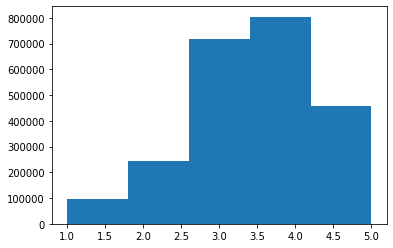

In [14]:
plt.hist(df["user_rating"], bins=5)
plt.show()

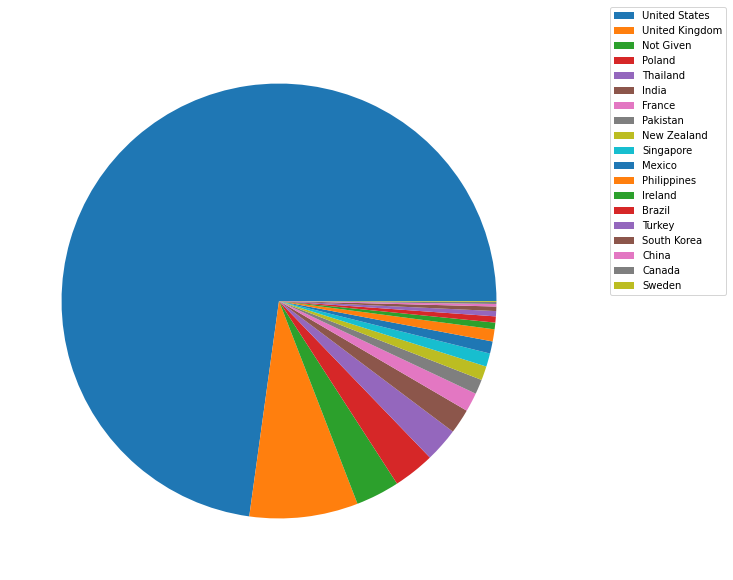

In [16]:
country_count = df.groupby("country").count().sort_values("title", ascending=False)
plt.figure(figsize=(10,10))
plt.pie(country_count["title"].iloc[0:30], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'].reverse())
ax = plt.subplot()
ax.legend(country_count['title'].iloc[0:30].index, bbox_to_anchor=(1.1, 1.05))
plt.show()


In [17]:
country_count['title'].iloc[0:30]

country
United States     1690362
United Kingdom     187217
Not Given           75482
Poland              71405
Thailand            58939
India               42697
France              32686
Pakistan            25393
New Zealand         24117
Singapore           22972
Mexico              20982
Philippines         20869
Ireland             11473
Brazil              10614
Turkey               9058
South Korea          7774
China                4297
Canada               3675
Sweden               1430
Name: title, dtype: int64

In [18]:
df_category_count = df.groupby("genres").count().sort_values("title", ascending=False)
max_30 = df_category_count["title"][0:30]
max_30

genres
Action & Adventure          652673
Comedies                    509990
Dramas                      364427
Children & Family Movies    174944
International TV Shows      168034
Classic Movies              133333
Crime TV Shows              113571
Thrillers                    77070
Horror Movies                52789
TV Dramas                    28174
Documentaries                26508
British TV Shows             14862
Kids' TV                      5067
Name: title, dtype: int64

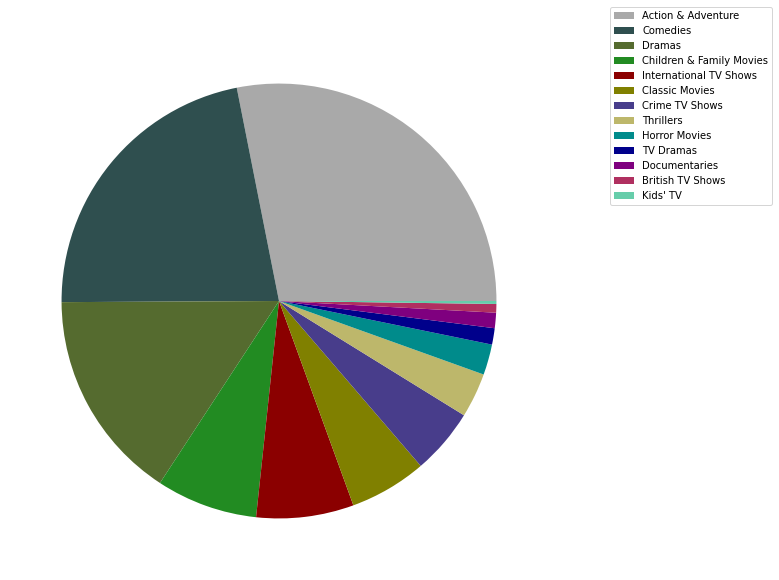

In [19]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("genres").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("genres").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

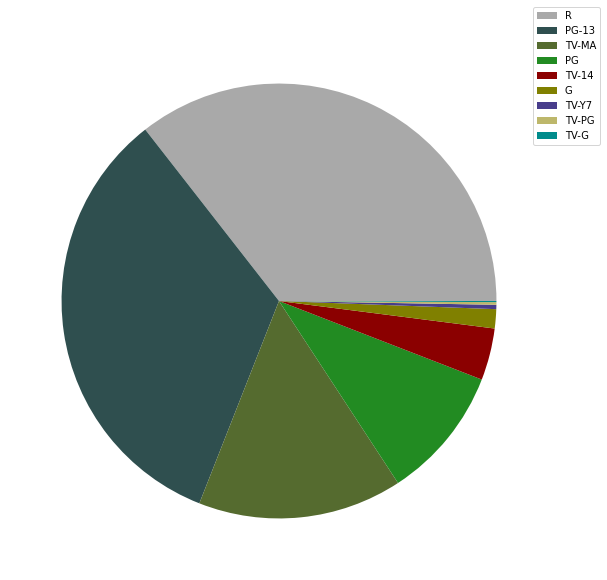

In [20]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("rating").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("rating").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

### Correlation Heatmap

## NOTE: Elaborate more on the heatmap Daniel and Cade

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Variables Removed

To start with we drop "show_id", "Movie_ID", "Year" from the dataframe. because show_id and movie_id are used to identify the movie but we are only going to use title. We also remove year, this is because it is a duplicate of release year.

In [ ]:
df.drop(["show_id", "Movie_ID", "Year"], axis=1, inplace=True)

Next we drop "date_added", because we assume it does not corrleate with "user_rating".

In [ ]:
df.drop(["date_added"], axis=1, inplace=True)

Next we drop "type" as the information has already be converted to is movie.

In [ ]:
df.drop("type", axis=1, inplace=True)

Finally we remove all all rows where is_movie is equal to 0, so only movies are in our dataframe, and we drop the column is_movie because it is only true so it is redundant.

In [ ]:
df = df[df["is_movie"]==1]
df.drop(["is_movie"], axis=1, inplace=True)

## Conclusion

## NOTE: Give us a conclusion Daniel and Cade